In [1]:
## Bring in needed mods
import pandas as pd, numpy as np, sys, scipy.stats as ss, glob

## Load in matplot lib
from matplotlib import pyplot as plt

## load in image
from matplotlib import image

## Bring in seaborn
import seaborn as sns

## Set random seed
np.random.seed(711)

In [2]:
## Load in sims
import mystatslib as sims

## Load in mod
from epigenomevisulization import loaddf, getsamples, cometplot, undermask, sortglob, loadbdg, plotgene

In [3]:
## Set paths to dataframe
## Vrinda's a549 cells
a549_path = '../DATA/BEDS/A549.Ceil.genomic.10000.counts.bed.gz'

## Encode data
enco_path = '../DATA/BEDS/ENCODE.Ceil.genomic.10000.counts.bed.gz'

In [4]:
## Read in the a549 data
enco = loaddf(enco_path)

## View head
enco.head()

,Chrom,Left,Right,merged.ENCLB404SKN.filtq30.bam,merged.ENCLB324GIU.filtq30.bam,merged.ENCLB584REF.filtq30.bam,merged.ENCLB758GEG.filtq30.bam,merged.ENCLB605LCC.filtq30.bam,merged.ENCLB293SLX.filtq30.bam,merged.ENCLB907YRF.filtq30.bam,merged.ENCLB918NXF.filtq30.bam,merged.ENCLB817BKI.filtq30.bam,merged.ENCLB734LAL.filtq30.bam,merged.ENCLB432QLN.filtq30.bam,merged.ENCLB621FEI.filtq30.bam,merged.ENCLB074EQT.filtq30.bam,merged.ENCLB984XHJ.filtq30.bam,merged.ENCLB937FOM.filtq30.bam,merged.ENCLB715JYV.filtq30.bam
0,chr1,1,10000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,chr1,10001,20000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,chr1,20001,30000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,chr1,30001,40000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,chr1,40001,50000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
## Print shape of enco df
enco.shape

(290066, 19)

In [6]:
## Read in the a549 data
a549 = loaddf(a549_path)

## View head
a549.head().T.head().T

,Chrom,Left,Right,merged.2501_001.filtq30.bam,merged.2501_002.filtq30.bam
0,chr1,1,10000,1.0,1.0
1,chr1,10001,20000,0.0,1.0
2,chr1,20001,30000,1.0,1.0
3,chr1,30001,40000,1.0,1.0
4,chr1,40001,50000,1.0,1.0


In [7]:
## print shape of a549 df 
a549.shape

(290066, 11)

In [8]:
## Gather the sample names
a549_names = getsamples(a549)

## Print the sample names
a549_names

['merged.2501_001.filtq30.bam',
 'merged.2501_002.filtq30.bam',
 'merged.2501_003.filtq30.bam',
 'merged.2501_007.filtq30.bam',
 'merged.2501_008.filtq30.bam',
 'merged.2501_018.filtq30.bam',
 'merged.2501_019.filtq30.bam',
 'merged.2501_020.filtq30.bam']

In [9]:
short_script = ['A549$_{%s}$'%i for i in ['100','101','102','200','201','300','301','302']]
short_script

['A549$_{100}$',
 'A549$_{101}$',
 'A549$_{102}$',
 'A549$_{200}$',
 'A549$_{201}$',
 'A549$_{300}$',
 'A549$_{301}$',
 'A549$_{302}$']

In [10]:
name_dict = dict(zip(a549_names,short_script))
name_dict

{'merged.2501_001.filtq30.bam': 'A549$_{100}$',
 'merged.2501_002.filtq30.bam': 'A549$_{101}$',
 'merged.2501_003.filtq30.bam': 'A549$_{102}$',
 'merged.2501_007.filtq30.bam': 'A549$_{200}$',
 'merged.2501_008.filtq30.bam': 'A549$_{201}$',
 'merged.2501_018.filtq30.bam': 'A549$_{300}$',
 'merged.2501_019.filtq30.bam': 'A549$_{301}$',
 'merged.2501_020.filtq30.bam': 'A549$_{302}$'}

In [11]:
a549_to_plot = np.array(a549_names)[[0,1,3,4,5,6]]

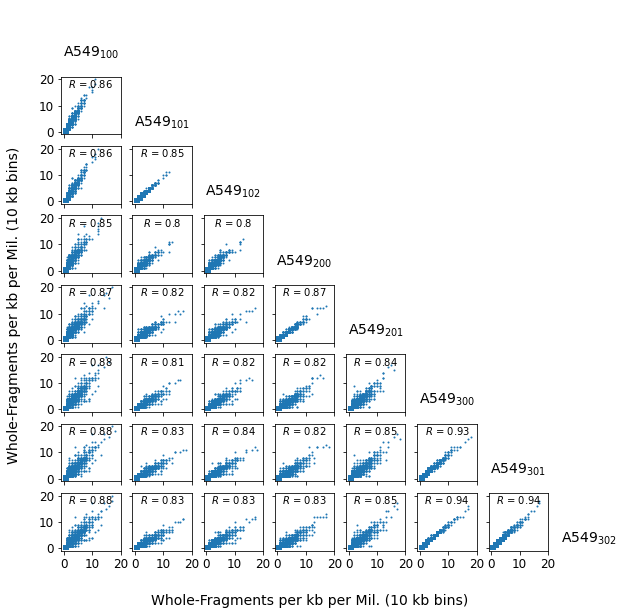

In [12]:
fig,ax = plt.subplots(8,8,figsize=(10,10),sharex=True,sharey=True);
fig.set_facecolor('w')

pearsons = []

for i,m1 in enumerate(a549_names):
    
    for j,m2 in enumerate(a549_names):
        
        if i > j:
            
            x = a549[m1].values
            y = a549[m2].values
            
            r = sims.copearson(x,y)
            
            pearsons.append((m1,m2,r))
            
            plt.sca(ax[i,j])
            plt.plot(x,y,'.',ms=2)
            plt.xticks(np.arange(0,30,10),fontsize=12)
            plt.yticks(np.arange(0,30,10),fontsize=12)
            #plt.text(x=15,y=3,s='$R$ = %s'%(round(r,2)),va='center',ha='center')
            plt.title('$R$ = %s'%(round(r,2)),y=0.7,fontsize=10)
            
        elif i == j:
            
            s = name_dict[m1]
            plt.sca(ax[i,j])
            plt.title(s,y=0.035,fontsize=14)
            plt.axis('off')
            
        else:
            plt.sca(ax[i,j]);plt.axis('off')
            
xlabel = 'Whole-Fragments per kb per Mil. (10 kb bins)'
fig.text(x=0.25,y=0.05,s=xlabel,fontsize=14)
fig.text(x=0.05,y=0.25,s=xlabel,fontsize=14,rotation=90);

## Save figure
#plt.savefig('/Users/croth/Documents/A549_bed_counts/Figure.1B.png', dpi=600, bbox_inches='tight')

In [13]:
#def rotate(n,x):
#    x = list(x)
#    return np.array(x[n:] + x[:n])

In [14]:
## Set x and y
x,y = a549[a549_names[-2]].values, a549[a549_names[-1]].values

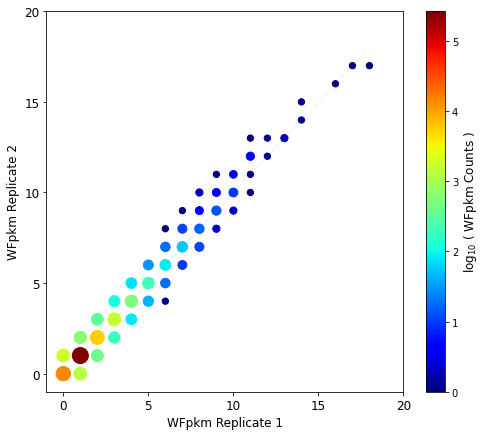

In [15]:
## Call figure and set facecolor
fig,ax = plt.subplots(1,1,figsize=(8,7))
fig.set_facecolor('w')

## Plot a comet plot
cometplot(x,y,ax=ax,plotmod=40);

## Add x and y label
plt.xlabel('WFpkm Replicate 1',fontsize=12)
plt.ylabel('WFpkm Replicate 2',fontsize=12)

## increase fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## Save figure
plt.savefig('../FIGURES/S.Figure.2.png',dpi=300,bbox_inches='tight');

In [16]:
## Mege the dataframes
sampledf = enco.merge(a549,on=['Chrom','Left','Right'])

## Remove vrindas original samples
#sampledf.drop(a549_names[:-3],inplace=True,axis=1)

## View shape
print(sampledf.shape)

## Get all the sample names
samples = getsamples(sampledf)

## Calculate if the samples with "merged" as the start of their name
merge_check = sum([s.split('.')[0] == 'merged' for s in samples])

## Set error message
unknown_sam = "ERROR: There are samples we do not recognize in this list!"

## Check our work 
assert merge_check == len(samples), unknown_sam 

(290066, 27)


In [17]:
## Write ftn for formating the bam file name 
def bamname(s):
    return 'merged.%s.filtq30.bam'%s

## Set table path, this csv file is generated in Mapping_stats_and_counts_Table1_STable1.ipynb
table_path = '../DATA/MISC/full.table.csv'

## Load table
full_table = pd.read_csv(table_path)

## Make a "bam file" name
bam_file_names = []

## Iterate thru replicate names
for s in full_table['Replicate Name'].tolist():
    ## Seperate the replicate name if the underscore is present 
    if '_' in s:
        new = bamname('_'.join(s.split('\_')))
    else: ## otherwise just pass the new name
        new = bamname(s)
    
    ## append to list
    bam_file_names.append(new)
        
## append column of new bam names
full_table['Bam File'] = bam_file_names

## Make a cellular type dictionary
cell_dict = dict(full_table[['Bam File','Sample Title']].values)

## Order the labels 
ordered_labels = full_table['Sample Title'].tolist()

## View head
full_table.head()

,Cell Line,Replicate Name,Total Reads,Mapped Reads,Not Used,Duplicates,mtDNA,Un-mapped,Low Quality Reads,MACS2 Peaks,FrIP,Sample Title,Source,Bam File
0,A549,ENCLB404SKN,341325836,259029456,21246814,46948944,12009324,408486,1682812,201532,0.5898,A549$_{000}$,ENCSR032RGS,merged.ENCLB404SKN.filtq30.bam
1,A549,ENCLB605LCC,442074976,329679445,27536117,66338506,15475857,506856,2538195,194975,0.5994,A549$_{001}$,ENCSR032RGS,merged.ENCLB605LCC.filtq30.bam
2,A549,ENCLB817BKI,277970512,211291691,18456829,35323112,11170486,343051,1385343,206536,0.5596,A549$_{002}$,ENCSR032RGS,merged.ENCLB817BKI.filtq30.bam
3,A549,2501\_001,65405524,23987725,2973344,3093813,33653170,48906,1648566,110323,0.5880,A549$_{100}$,This study,merged.2501_001.filtq30.bam
4,A549,2501\_002,84816540,22605005,2595465,2481489,55231224,32350,1871007,81917,0.3404,A549$_{101}$,This study,merged.2501_002.filtq30.bam


In [18]:
## Correlate the samples vis norm. mutual. info. removing cozeros
nmi = sampledf[samples].corr(sims.conmi)

## Replace the columns and index
nmi.columns, nmi.index = [cell_dict[c] for c in nmi.columns], [cell_dict[c] for c in nmi.index]

## Reorder the lables 
nmi = nmi.loc[ordered_labels,ordered_labels]

## Save out dataframe
nmi.to_csv('../DATA/MISC/ENCODE_nmi.csv')

## View the corner
nmi.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.692698,0.664162,0.425950,0.393376
A549$_{001}$,0.692698,1.000000,0.628433,0.415187,0.374307
A549$_{002}$,0.664162,0.628433,1.000000,0.414897,0.391875
A549$_{100}$,0.425950,0.415187,0.414897,1.000000,0.486500
A549$_{101}$,0.393376,0.374307,0.391875,0.486500,1.000000


In [19]:
## Correlate the samples vis pearson removing cozeros
per = sampledf[samples].corr(sims.copearson)

## Replace the columns and index
per.columns, per.index = [cell_dict[c] for c in per.columns], [cell_dict[c] for c in per.index]

## Reorder the lables 
per = per.loc[ordered_labels,ordered_labels]

## Save out dataframes for later use
per.to_csv('../DATA/MISC/ENCODE_per.csv')

## View the head
per.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.881532,0.864376,0.771390,0.682399
A549$_{001}$,0.881532,1.000000,0.849103,0.764431,0.668322
A549$_{002}$,0.864376,0.849103,1.000000,0.773057,0.684480
A549$_{100}$,0.771390,0.764431,0.773057,1.000000,0.855034
A549$_{101}$,0.682399,0.668322,0.684480,0.855034,1.000000


In [20]:
## Correlate the samples vis pearson removing cozeros
spe = sampledf[samples].corr(sims.cospearman)

## Replace the columns and index
spe.columns, spe.index = [cell_dict[c] for c in spe.columns], [cell_dict[c] for c in spe.index]

## Reorder the lables 
spe = spe.loc[ordered_labels,ordered_labels]

## Save out the df
spe.to_csv('../DATA/MISC/ENCODE_spe.csv')

## View the head
spe.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.804573,0.783209,0.636135,0.570435
A549$_{001}$,0.804573,1.000000,0.762978,0.628000,0.550707
A549$_{002}$,0.783209,0.762978,1.000000,0.621773,0.566785
A549$_{100}$,0.636135,0.628000,0.621773,1.000000,0.622356
A549$_{101}$,0.570435,0.550707,0.566785,0.622356,1.000000


In [21]:
## Correlate the samples vis norm. mutual. info. removing cozeros
rsq = sampledf[samples].corr(sims.copearson)**2

## Replace the columns and index
rsq.columns, rsq.index = [cell_dict[c] for c in rsq.columns], [cell_dict[c] for c in rsq.index]

## Reorder the lables 
rsq = rsq.loc[ordered_labels,ordered_labels]

## Save out dataframe
rsq.to_csv('../DATA/MISC/ENCODE_rsq.csv')

## View the head
rsq.head().T.head()

,A549$_{000}$,A549$_{001}$,A549$_{002}$,A549$_{100}$,A549$_{101}$
A549$_{000}$,1.000000,0.777098,0.747146,0.595043,0.465668
A549$_{001}$,0.777098,1.000000,0.720976,0.584355,0.446654
A549$_{002}$,0.747146,0.720976,1.000000,0.597618,0.468513
A549$_{100}$,0.595043,0.584355,0.597618,1.000000,0.731083
A549$_{101}$,0.465668,0.446654,0.468513,0.731083,1.000000


In [22]:
## Set the stat lables
stat_labels = ['Pearson $R$','Spearman '+ '\u03C1','$R^2$','Normalized Mutual Information']

## print to screen
[print(s) for s in stat_labels];

Pearson $R$
Spearman ρ
$R^2$
Normalized Mutual Information


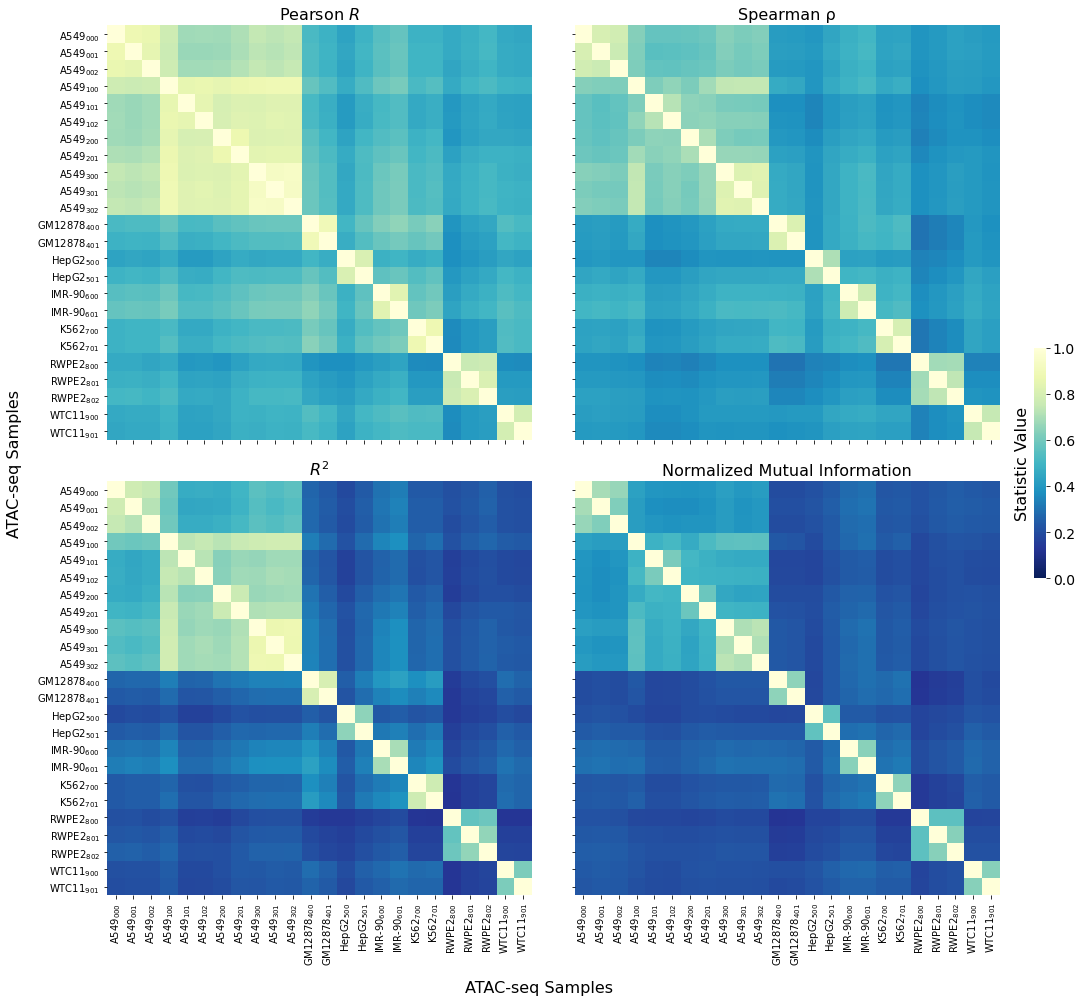

In [24]:
## Call a figure, and set the face color
fig,ax = plt.subplots(2,2,figsize=(16,16),sharex=True,sharey=True)
fig.set_facecolor('w')

## Make a list of the comparisons, set the color map, and make a color bar axis
mycomps, mycmap, cax = [per,spe,rsq,nmi], "YlGnBu_r",  fig.add_axes([0.93,0.4,0.01,0.2])

## Iterate thru the list
for i,df in enumerate(mycomps):

    ## Set the first axis
    plt.sca(ax.ravel()[i])
    
    ## Set the title
    plt.title(stat_labels[i],fontsize=16)

    ## Call the pearson
    sns.heatmap(df,vmin=0,vmax=1,cbar=False if i < 3 else True, cbar_ax=cax,cmap=mycmap)
    
## Set the color bar axis
plt.sca(cax);plt.yticks(fontsize=14); #plt.ylabel('Statistic Value',fontsize=14)

## Adjust the plots
plt.subplots_adjust(wspace=0.1,hspace=0.1);

## Add x and y lables
fig.text(0.5,0.045,'ATAC-seq Samples',fontsize=16,va='center',ha='center')
fig.text(0.045,0.5,'ATAC-seq Samples',fontsize=16,va='center',ha='center',rotation=90)

## Add color bar label manually
fig.text(0.92,0.5,'Statistic Value',fontsize=16,va='center',ha='center',rotation=90)

## Set save path
savepath = '../FIGURES/Figure.4.png'

## Save the dataframe
if savepath:
    plt.savefig(savepath,dpi=600,bbox_inches='tight');

In [25]:
## Gather the lower tri of each correlation values
per_val, spe_val, rsq_val, nmi_val = undermask(per), undermask(spe), undermask(rsq), undermask(nmi)

## Calcluate variance for each stat
k = np.round(np.array([np.var(per_val,ddof=1),np.var(spe_val,ddof=1),np.var(rsq_val,ddof=1),np.var(nmi_val,ddof=1)]),4)

## Print to screen
k

array([0.0201, 0.0136, 0.0329, 0.016 ])

In [26]:
## Calculate test for same variance 
ss.levene(rsq_val,nmi_val,per_val,spe_val)

LeveneResult(statistic=7.833156171576607, pvalue=3.560144974592398e-05)

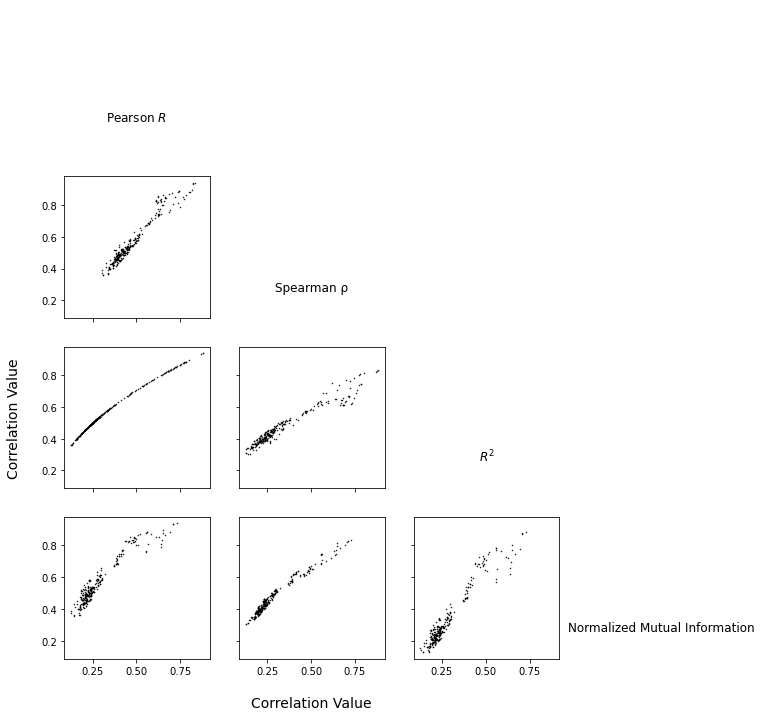

In [27]:
## Call a figure set facecolor to w
fig,ax = plt.subplots(4,4,figsize=(12,12),sharex=True,sharey=True)
fig.set_facecolor('w')

## Group the correlation and association vars 
rvalues = [per_val,spe_val,rsq_val,nmi_val]

## Set the lables 
labels = stat_labels

## iterate thru the correlation values 
for i, r1 in enumerate(rvalues):
    for j,r2 in enumerate(rvalues):
        
        ## Plot if i is large tahn j 
        if i > j:
            plt.sca(ax[i,j])
            plt.plot(r1,r2,'k.',ms=1)
    
        ## If the row and col are equal add the title 
        elif i == j:
            
            plt.sca(ax[i,j])
            plt.axis('off')
            plt.title(stat_labels[i],y=0.15);
            
        ## Otherwise remove the axis 
        else:
            plt.sca(ax[i,j]);plt.axis('off')

## Add x- and y-axis lables 
plt.sca(ax[2,0]);plt.ylabel('Correlation Value\n',fontsize=14)
plt.sca(ax[-1,1]);plt.xlabel('\nCorrelation Value',fontsize=14);

## Save the figure
savepath = None#'/Users/croth/Documents/A549_bed_counts/S.Figure.6.png'

## Save out the figure 
if savepath:
    plt.savefig(savepath,dpi=300,bbox_inches='tight');

In [28]:
## Visulization of co-zero values in real data 
dfzeros = pd.DataFrame(index=samples,columns=samples,dtype=float)

## Gather the number of fpkm genomic bins 
nbins = sampledf.shape[0]

## Iterate over the samples, wtice 
for i,s1 in enumerate(samples):
    for j,s2 in enumerate(samples):
        
        ## Calcualte the percent of co-zeros
        dfzeros.loc[s1,s2] = float(sampledf[(sampledf[s1] == 0) & (sampledf[s2] == 0)].shape[0]/nbins)
        
## Rename the column and index
dfzeros.columns = [cell_dict[c] for c in dfzeros.columns]
dfzeros.index   = [cell_dict[c] for c in dfzeros.index]

## order the column and index
dfzeros = 100*dfzeros.loc[ordered_labels,ordered_labels]

4.799888371232254


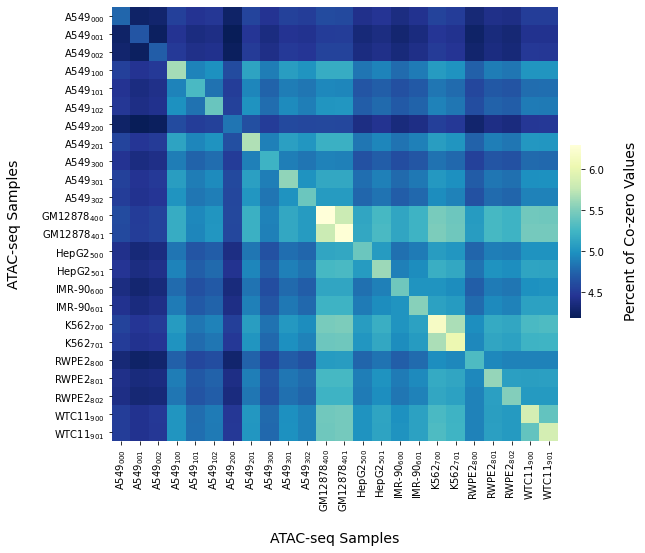

In [29]:
## Call a fugre, set face color to w
fig,ax = plt.subplots(1,1,figsize=(8,8))
fig.set_facecolor('w')

## Set color bar 
cax = fig.add_axes([0.92,0.34,0.02,0.3])

## Call heatmap
sns.heatmap(dfzeros,cmap=mycmap,cbar_ax=cax,ax=ax);

## Set axis 
plt.sca(ax)

## Add y and x-axis labels
plt.xlabel('\nATAC-seq Samples',fontsize=14)
plt.ylabel('ATAC-seq Samples\n',fontsize=14)

## Label color bar
plt.sca(cax);plt.ylabel('\nPercent of Co-zero Values',fontsize=14);

## Set save path
savepath = '../FIGURES/S.Figure.3.png'

## Sae the figure
plt.savefig(savepath,dpi=300,bbox_inches='tight');

## Gather the lower zero as a vector 
lower_zero_tri = undermask(dfzeros)

## print the mean
print(lower_zero_tri.mean())

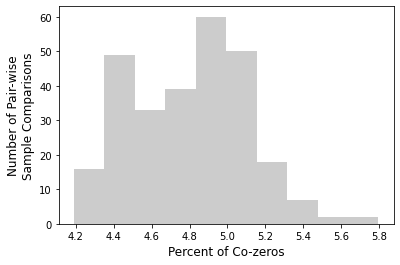

In [30]:
## plot a histogram of the co-zero values 
plt.hist(lower_zero_tri,alpha=0.4,color='grey');

## Add x- and y-axis labels
plt.xlabel('Percent of Co-zeros',fontsize=12);
plt.ylabel('Number of Pair-wise\nSample Comparisons',fontsize=12);

In [31]:
## Set the chrom we want to parse and plot from the bdg files 
chrom_to_plot = 'chr9'

## gather the paths 
bdg_paths = sortglob(f'../DATA/macs2/bdg/2501_0*_{chrom_to_plot}_treat_pileup.bdg*')

## Print the paths 
bdg_paths

['../DATA/macs2/bdg/2501_001_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_002_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_003_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_007_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_008_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_018_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_019_chr9_treat_pileup.bdg.gz',
 '../DATA/macs2/bdg/2501_020_chr9_treat_pileup.bdg.gz']

In [32]:
## Set the left, right and chrom anme 
left, right, thechrom = 140500000,141400000, 'NC_060933.1'

## Set the path to the annotation dataframe 
igv_savepath = f'../DATA/IGV/{thechrom}_{left}_{right}.tsv'

## laod int he datframe 
igv = pd.read_csv(igv_savepath,sep='\t')

In [33]:
## Load in the bdgs 
bdgs = [loadbdg(p,chrom_to_plot,left,right) for p in bdg_paths]

## Print the max fpkm and start positons 
bdgs[0].FpKM.max(), bdgs[0].Start.max()

(38.01864, 141399583)

In [34]:
## Set the colors for plotting 
bdg_color = ['tab:brown' for i in range(3)] + ['tab:orange' for i in range(2)] + ['tab:green' for i in range(3)]

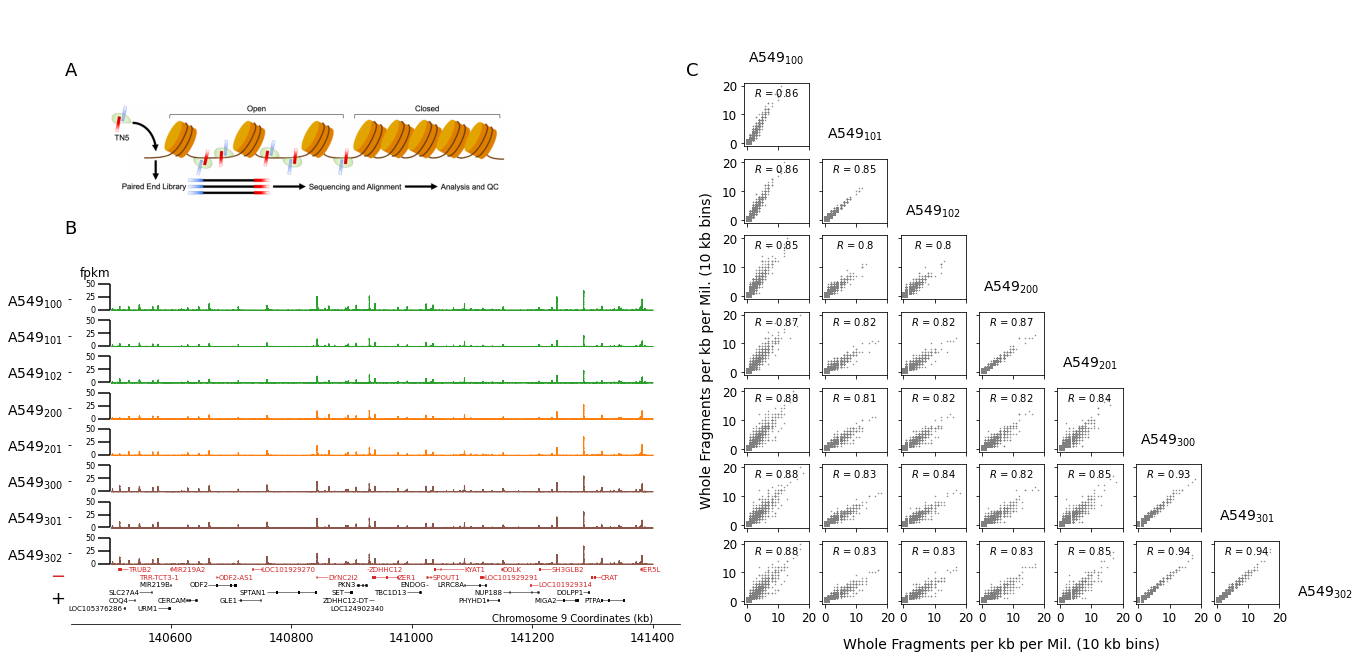

In [35]:
## Call a figure set facecolro 
fig,ax = plt.subplots(8,8,figsize=(11,11),sharex=True,sharey=True);
fig.set_facecolor('w')

## Initilize list 
pearsons = []

## Iterate thru A549 sample names 
for i,m1 in enumerate(a549_names):
    for j,m2 in enumerate(a549_names):
        
        if i > j:
            
            x = a549[m1].values
            y = a549[m2].values
            
            r = sims.copearson(x,y)
            
            pearsons.append((m1,m2,r))
            
            plt.sca(ax[i,j])
            plt.plot(x,y,'.',ms=1,color='grey')
            plt.xticks(np.arange(0,30,10),fontsize=12)
            plt.yticks(np.arange(0,30,10),fontsize=12)
            plt.title('$R$ = %s'%(round(r,2)),y=0.7,fontsize=10)
            
        elif i == j:
            
            s = name_dict[m1]
            plt.sca(ax[i,j])
            plt.title(s,y=0.035,fontsize=14)
            plt.axis('off')
            
        else:
            plt.sca(ax[i,j]);plt.axis('off')

## Set the xlabel 
xlabel = 'Whole Fragments per kb per Mil. (10 kb bins)'

## Annotate the plot 
fig.text(x=0.25,y=0.07,s=xlabel,fontsize=14)
fig.text(x=0.07,y=0.25,s=xlabel,fontsize=14,rotation=90);

## Set the x-axis loc of the sub plots
sub_xloc = -0.725

## add axis for atac
atac_ix = fig.add_axes([sub_xloc+0.05,0.6,0.5,0.2])

## Set the atac ix
plt.sca(atac_ix)

## Load in image
atac_path = image.imread('../FIGURES/Figure1_newA.png')

## Place image
plt.imshow(atac_path)

## Turn off the axis
plt.axis('off')

## Plot the igv
igv_ix = fig.add_axes([sub_xloc,0.1,0.77,0.45])
    
## Set the axis
plt.sca(igv_ix)

## Turn off the the axis
[igv_ix.spines[t].set_visible(False) for t in ['top','right','left']]

## Annoate the plot 
plt.text(x=141.4*(10**6),y=-110,s='Chromosome 9 Coordinates (kb)',fontsize=10,ha='right')
plt.text(x=140.4*(10**6),y=-33, s = u"\u2212",fontsize=18,color='tab:red')
plt.text(x=140.4*(10**6),y=-75, s = '+',      fontsize=18,color='k')

## Set the seporator space 
sep = 70

## Iterate thrut he bdg files 
for i,b in enumerate(bdgs[::-1]):
    
    ## Plot a window of interest
    plt.fill_between(b.Meanpos.values,sep*i,b.FpKM.values+(sep*i),color=bdg_color[i],rasterized=True);
    
    ## Plot the xaxis
    plt.vlines(left,sep*i,(sep-20)+(sep*i),color='k')
    
    liney = (sep*i)+np.array([0,25,50])
    plt.hlines(liney , left-20000,left,color='k')
    
    [plt.text(x=left-25000,y = liney[j],s =s, fontsize=8,va='center',ha='right')  for j,s in enumerate([0,25,50])]
    
## reset the xticks with kilo base coordinates
p,l = plt.xticks()

## Set the xticks
plt.xticks(p[1:-1],np.array(p[1:-1]/1000,dtype=int),fontsize=12)

## Set the xlimis
#plt.xlim(p[1]-100000,p[-2]+100000)

## reset the yticks with sample names
plt.yticks((np.arange(1,len(bdg_paths)+1) * sep)-50,short_script[::-1],fontsize=14);

## Add a ylabel
#plt.xlabel('Chromosome 9 Coordinates (kb)',fontsize=14);

## Add an fpkm label
plt.text(x=left-25000,y=np.max(liney)+22,s='fpkm',va='center',ha='center',fontsize=12);

## Add an A and B label
[fig.text(x=(sub_xloc,sub_xloc,0.06)[i],y=(0.8,0.6,0.8)[i],s=b,va='center',ha='center',fontsize=18) for i,b in enumerate(['A','B','C'])];

## Seperate gene by strand and make positions
pos_igv = igv.groupby('Gene')

## Load in the positional df
pos_df = pd.read_csv('../DATA/MISC/y_position_df.csv',index_col=0)

## Add negative genes
for i,(j,g) in enumerate(pos_igv):
    if 'gene' in g.Feature.tolist():
        plotgene(g, y=pos_df.loc[j,'Ypos'].min(),ymod=5,fs=7)

## Save the figure
plt.savefig('../FIGURES/Figure.1.png',dpi=1200,bbox_inches='tight');

In [36]:
## Set the left and right positions and chromosome
nleft, nright, thechrom2 = 64500000, 65800000, 'NC_060941.1'

## Set the savepath to the annotation data
igv2_savepath = f'../DATA/IGV/{thechrom2}_{nleft}_{nright}.tsv'

## Load in the data 
igv2 = pd.read_csv(igv2_savepath,sep='\t')

In [37]:
## Set path to the chromosome 17 pile up 
r0_path = '../DATA/macs2/bdg/2501_001_chr17_treat_pileup.bdg.gz'
r1_path = '../DATA/macs2/bdg/r1_0.5_0.85_0_110_chr17_treat_pileup.bdg.gz'
r2_path = '../DATA/macs2/bdg/r2_0.5_0.85_0_110_chr17_treat_pileup.bdg.gz'

## Load in the data 
r0 = loadbdg(r0_path,'chr17',nleft,nright)
r1 = loadbdg(r1_path,'chr17',nleft,nright)
r2 = loadbdg(r2_path,'chr17',nleft,nright)

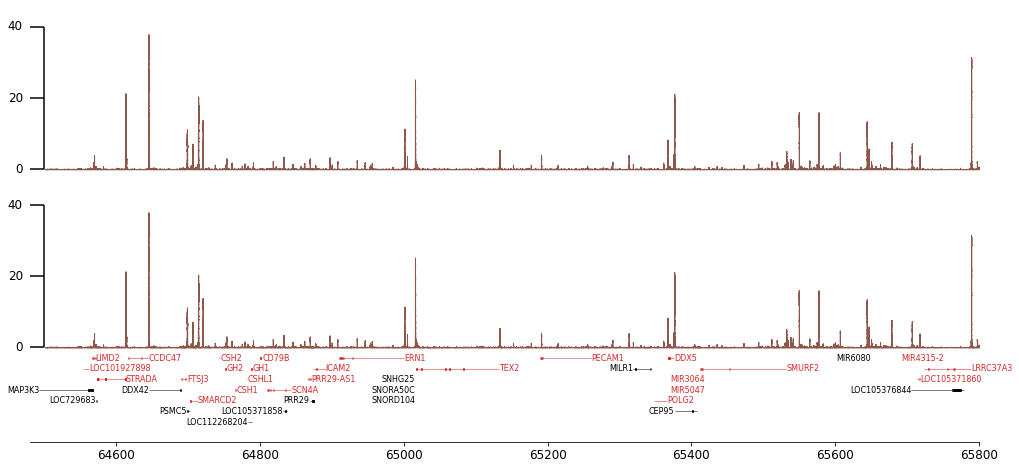

In [38]:
## Call a figure
fig,ax = plt.subplots(1,1,figsize=(17,8),sharex=True,sharey=True)
fig.set_facecolor('w')

## Plot the first
plt.fill_between(r0.Meanpos.values,0,r0.FpKM.values,color='tab:brown',rasterized=True);

## Plot the y-axis
plt.vlines(nleft,0,40,color='k')
plt.hlines(np.array([0,20,40]),nleft,nleft-25000,color='k')
[plt.text(nleft-30000,s,s,va='center',ha='right',color='k',fontsize=12) for s in [0,20,40]]

## Call a figure
plt.fill_between(r0.Meanpos.values,50,r0.FpKM.values+50,color='tab:brown',rasterized=True);

## Plot the y-axis
plt.vlines(nleft,50,90,color='k')
plt.hlines(np.array([0,20,40])+50,nleft,nleft-25000,color='k')
[plt.text(nleft-30000,s+50,s,va='center',ha='right',color='k',fontsize=12) for s in [0,20,40]];

## Get the xticks
p,l = plt.xticks()

## reset the ticks
plt.xticks(p[1:-1],np.array(p[1:-1]/1000,dtype=int),fontsize=12);

## Turn off the the axis
[ax.spines[t].set_visible(False) for t in ['top','right','left']];

## Turn off the yticks
plt.yticks([]);

## Set the xlimits
plt.xlim(nleft-20000,nright);

## Load in the positional vector
pos_df = pd.read_csv('../DATA/MISC/figure.2A_1.pos.csv',index_col=0,header=None)

## Plot the gene
for i,(j,g) in enumerate(igv2.groupby('Gene')):
    if 'gene' in g.Feature.tolist():
        plotgene(g, y = pos_df.loc[j,1],ymod=5)

## save the figure
plt.savefig('../FIGURES/Figure.2A_1.png',dpi=600,bbox_inches='tight');

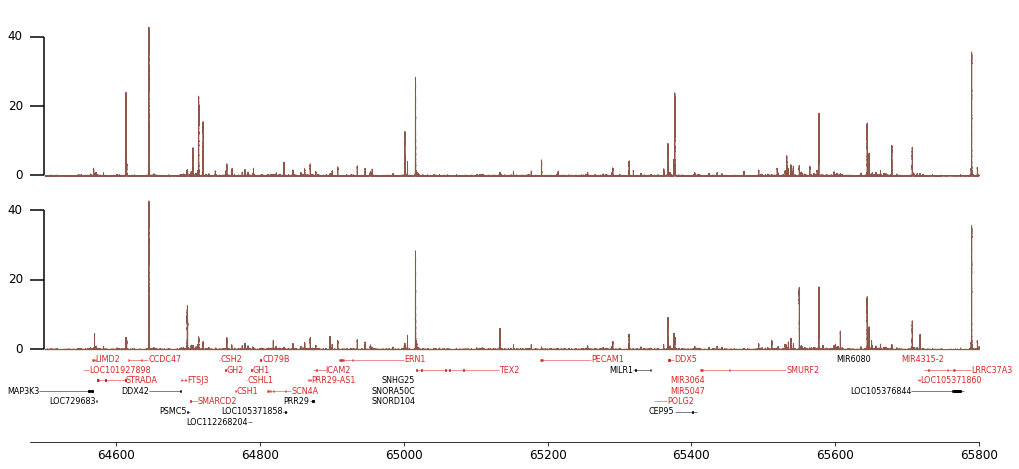

In [39]:
## Call a figure
fig,ax = plt.subplots(1,1,figsize=(17,8),sharex=True,sharey=True)
fig.set_facecolor('w')

## Plot the first
plt.fill_between(r1.Meanpos.values,0,r1.FpKM.values,color='tab:brown',rasterized=True);

## Plot the y-axis
plt.vlines(nleft,0,40,color='k')
plt.hlines(np.array([0,20,40]),nleft,nleft-25000,color='k')
[plt.text(nleft-30000,s,s,va='center',ha='right',color='k',fontsize=12) for s in [0,20,40]]

## Call a figure
plt.fill_between(r2.Meanpos.values,50,r2.FpKM.values+50,color='tab:brown',rasterized=True);

## Plot the y-axis
plt.vlines(nleft,50,90,color='k')
plt.hlines(np.array([0,20,40])+50,nleft,nleft-25000,color='k')
[plt.text(nleft-30000,s+50,s,va='center',ha='right',color='k',fontsize=12) for s in [0,20,40]];

## Get the xticks
p,l = plt.xticks()

## reset the ticks
plt.xticks(p[1:-1],np.array(p[1:-1]/1000,dtype=int),fontsize=12);

## Turn off the the axis
[ax.spines[t].set_visible(False) for t in ['top','right','left']];

## Turn off the yticks
plt.yticks([]);

## Set the xlimits
plt.xlim(nleft-20000,nright);

## Load in the positional vector
pos_df = pd.read_csv('../DATA/MISC/figure.2A_1.pos.csv',index_col=0,header=None)

## Plot the gene
for i,(j,g) in enumerate(igv2.groupby('Gene')):
    if 'gene' in g.Feature.tolist():
        plotgene(g, y = pos_df.loc[j,1],ymod=5)

## save the figure
plt.savefig('../FIGURES/Figure.2A_2.png',dpi=600,bbox_inches='tight');

In [40]:
## Get the list of column names 
col_list = nmi.columns.tolist()

In [41]:
## Wrtie ftns for parsing sample column names
## Ftn for cell type 
def getct(n):
    return n.split('$_')[0]

## Ftn for getting experiment number 
def getexpn(n):
    return n.split('{')[1].split('}')[0]

## Ftn for getting exp index
def getre(n):
    return int(getexpn(n)[0])

## Ftn for repicate index 
def getri(n):
    return int(getexpn(n)[-1])

In [42]:
## Initilize list
longdf = []

## Iterate thru the columns and index
for j,nj in enumerate(col_list):
    for i,ni in enumerate(col_list):
        
        if (i>j) and (ni!=nj):
        
            ## Set cell lines
            cell1,  cell2  = getct(ni), getct(nj)

            ## Set the experiment index
            exp_ix1, exp_ix2 = getre(ni), getre(nj)

            ## Set the replicate index
            rep_ix1, rep_ix2 = getri(ni), getri(nj) 

            ## Gather the correlation metrics
            cor_r, cor_m = rsq.loc[nj,ni].min(), nmi.loc[nj,ni].min()

            ## Set the y-axis values and replicate colors 
            ## For true replicates ... 
            ## cell types are same, experiment index is same, replicate index is not
            if (cell1 == cell2) and (exp_ix1 == exp_ix2) and (rep_ix1 != rep_ix2):
                y, color = 2, 'k'

            ## Same cell line, different replicates 
            ## They are the same cells ie, A549 cells, but not experimental replicates
            elif (cell1 == cell2) and (exp_ix1 != exp_ix2):
                y, color = 1, 'r'

            ## Non-replicates, cell types are different and so are the exp index
            elif (cell1 != cell2) and (exp_ix1 != exp_ix2):
                y, color = 0, 'k'
                
             ## Append to to the list
            longdf.append((cell1,cell2,exp_ix1,exp_ix2,rep_ix1,rep_ix2,y,color,cor_r,cor_m))

        ## Otherwise, these are the same record
        else:
            pass
            
## Make into a dataframe
longdf = pd.DataFrame(longdf,columns=['Cell1','Cell2','Exp1','Exp2','Rep1','Rep2','Isrep','Color','Rsq','Nmi'])

## View head of long dataframe
longdf.head()

,Cell1,Cell2,Exp1,Exp2,Rep1,Rep2,Isrep,Color,Rsq,Nmi
0,A549,A549,0,0,1,0,2,k,0.777098,0.692698
1,A549,A549,0,0,2,0,2,k,0.747146,0.664162
2,A549,A549,1,0,0,0,1,r,0.595043,0.425950
3,A549,A549,1,0,1,0,1,r,0.465668,0.393376
4,A549,A549,1,0,2,0,1,r,0.469638,0.388754


In [43]:
## print the shape 
longdf.shape

(276, 10)

In [44]:
## Save out the dataframe
longdf.to_csv('../DATA/MISC/Replicate.correlations.long.csv',index=False)

## View tail
longdf.tail()